In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/insurance-data/new_insurance_data.csv


In [77]:
df = pd.read_csv("/kaggle/input/insurance-data/new_insurance_data.csv")

In [ ]:
df.head(20)

****Our Target column is Charges****

# Exploratory Data Analysis

1. The no of rows and columns in dataset


In [ ]:
df.shape

2. No of null values, total column, no of rows and columns and data type

In [ ]:
df.info()

3. We will now check for null values

In [ ]:
df.isnull().sum()
# there are some null values 

4. We can replace or remove the null data. 
5. When data type is **object**, We can replace the null values with mode.
6. When data type is **numeric**, We can replace the null values with mean or median.


In [ ]:
df.columns

> smoker column is object datatyoe that's why we are taking the mode

In [ ]:
df["smoker"].mode()

In [79]:
df["smoker"].mode()[0]
# No index value is appearing only value is appearing

'no'

* Replacing an outlier with the mean is appropriate when the data is **symmetrical** and the outlier does not have a significant effect on the central tendency of the data. On the other hand, replacing an outlier with the median is appropriate when the data is **skewed** and the outlier has a significant effect on the central tendency of the data, as the median is not affected by outliers.
*  ways to check if a data set is symmetrical or skewed:
    * **Visual inspection**: A histogram or a box plot can be used to visually inspect the distribution of the data. A symmetrical data set will have a bell-shaped histogram and the median will be in the middle of the box plot. A skewed data set will have an uneven histogram and the median will not be in the middle of the box plot.

    * **Measures of central tendency**: The mean and median of the data can be calculated and compared. If the mean and median are close, the data is likely symmetrical. If the mean is significantly different from the median, the data is likely skewed.

    * **Measures of skewnes**s: The skewness of the data can be calculated to quantify how asymmetrical it is. A skewness of 0 indicates a symmetrical data set, while a skewness greater than 0 indicates a positive skew (a long tail on the right) and a skewness less than 0 indicates a negative skew (a long tail on the left).

In [80]:
col = list(df.columns)
col
# datatype here is list
for col_name in col:
    if df[col_name].dtype == "object":
         df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    else:
        df[col_name] = df[col_name].fillna(df[col_name].mean())
        
#lets check the null values now
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

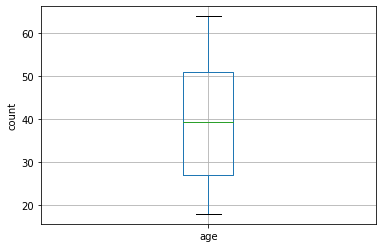

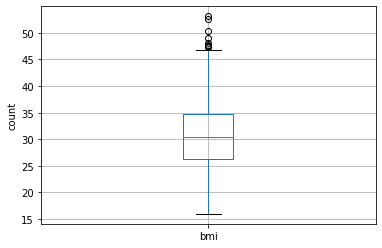

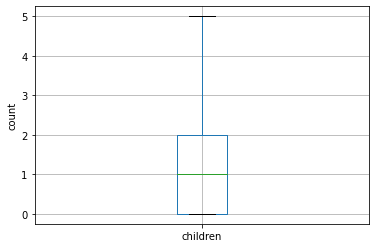

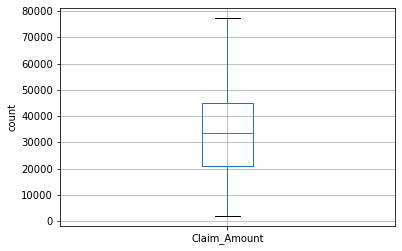

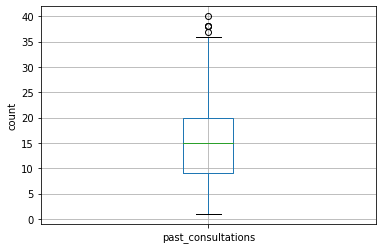

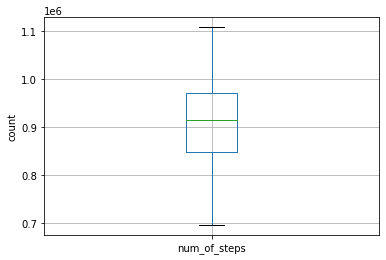

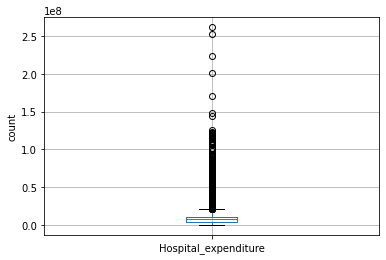

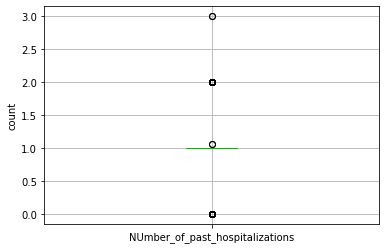

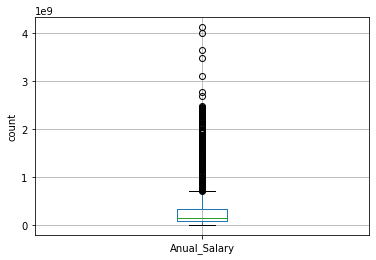

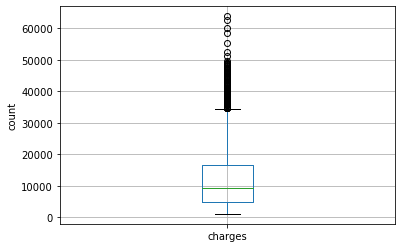

In [81]:

# Plotting the boxplot for each column one by one using the for loop
col = list(df.columns)
col
# datatype here is list

for col_name in col:
    if(df[col_name].dtypes == "float64"):
        plt.figure()
        df.boxplot([col_name])
        
        plt.ylabel("count")
        plt.show()


# Treating the Outliers

In [82]:

Q1  = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
Q1, Q3

(26.315, 34.65625)

* IQR is Inter Quartile Range

In [83]:

IQR = Q3 - Q1
IQR

8.341249999999999

* For finding the minimum(Lower Limit) and maximum(Upper Limit)


In [84]:
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR
LL, UL

(13.803125000000003, 47.168124999999996)

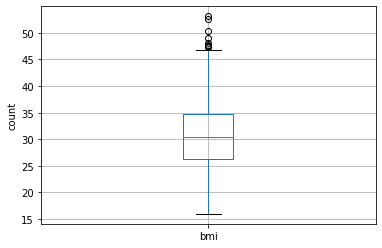

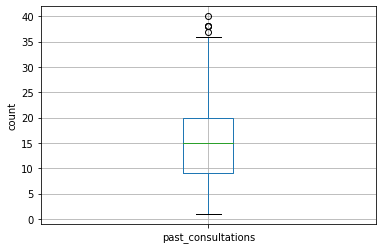

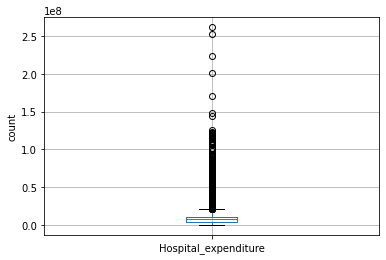

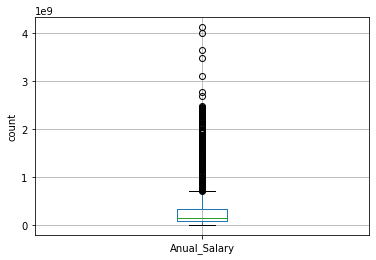

In [85]:
cols = ["bmi", "past_consultations", "Hospital_expenditure", "Anual_Salary"]
for col_name in cols:
    if(df[col_name].dtypes == "float64"):
        plt.figure()
        df.boxplot([col_name])
        
        plt.ylabel("count")
        plt.show()


In [86]:
cols = ["bmi", "past_consultations", "Hospital_expenditure", "Anual_Salary"]
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]



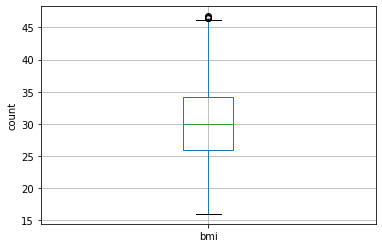

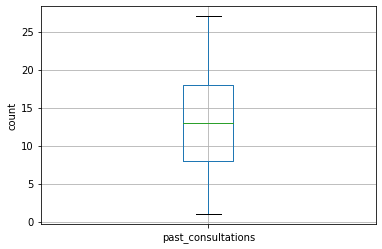

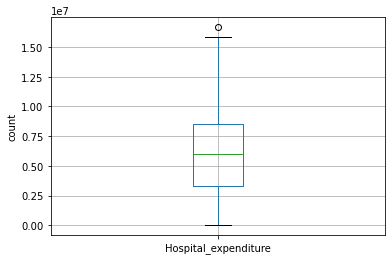

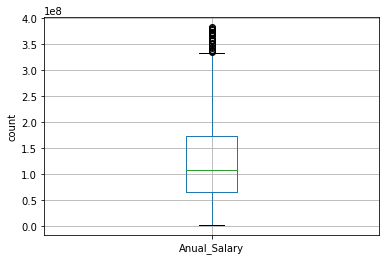

In [87]:
cols = ["bmi", "past_consultations", "Hospital_expenditure", "Anual_Salary"]
for col_name in cols:
    if(df[col_name].dtypes == "float64"):
        plt.figure()
        df.boxplot([col_name])
        
        plt.ylabel("count")
        plt.show()


In [88]:
df.corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.155957,0.045371,0.117750,0.172063,0.749468,0.160555,0.519538,0.490802,0.676071
bmi,0.155957,1.000000,0.006477,0.008343,0.023543,0.040324,0.013992,0.016121,0.004105,0.010248
children,0.045371,0.006477,1.000000,0.041716,0.045472,0.228830,-0.007494,0.316622,0.064840,0.138470
Claim_Amount,0.117750,0.008343,0.041716,1.000000,0.071569,0.185434,0.054111,0.109748,0.157826,0.192601
past_consultations,0.172063,0.023543,0.045472,0.071569,1.000000,0.259401,0.088466,0.135498,0.265710,0.278131
num_of_steps,0.749468,0.040324,0.228830,0.185434,0.259401,1.000000,0.299554,0.714983,0.767247,0.936946
Hospital_expenditure,0.160555,0.013992,-0.007494,0.054111,0.088466,0.299554,1.000000,0.129334,0.366809,0.358378
NUmber_of_past_hospitalizations,0.519538,0.016121,0.316622,0.109748,0.135498,0.714983,0.129334,1.000000,0.359422,0.538116
Anual_Salary,0.490802,0.004105,0.064840,0.157826,0.265710,0.767247,0.366809,0.359422,1.000000,0.892308
charges,0.676071,0.010248,0.138470,0.192601,0.278131,0.936946,0.358378,0.538116,0.892308,1.000000


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# VIF
*  A VIF score of 1 indicates that there is no multicollinearity, while a score greater than 1 indicates an increasing level of multicollinearity. A score of 5 or higher is generally considered to indicate high multicollinearity, which can lead to unstable and unreliable regression models.
*  A VIF score of 1 indicates that there is no multicollinearity, while a score greater than 1 indicates an increasing level of multicollinearity. A score of 5 or higher is generally considered to indicate high multicollinearity, which can lead to unstable and unreliable regression models.

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if ((df[col].dtype != "object") & (col != "charges")):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

NameError: name 'df' is not defined

In [91]:

X.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [3.10000000e+01, 2.98100000e+01, 0.00000000e+00, ...,
        1.02899068e+07, 1.00000000e+00, 3.74530951e+08],
       [4.30000000e+01, 2.00450000e+01, 2.00000000e+00, ...,
        1.08303011e+07, 1.00000000e+00, 3.69684860e+08],
       [3.50000000e+01, 2.80250000e+01, 0.00000000e+00, ...,
        1.24774431e+07, 1.00000000e+00, 3.69684860e+08]])

* We gonna drop the columns with vif factor more than 5 one by one

In [100]:
df = df.drop(["NUmber_of_past_hospitalizations"], axis = 1)

In [102]:
col_list = []
for col in df.columns:
    if ((df[col].dtype != "object") & (col != "charges")):
        col_list.append(col)
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                Feature       VIF
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [106]:
x = df.loc[:, ["children", "Claim_Amount", "past_consultations", "Hospital_expenditure", "Anual_Salary"]]
y = df.iloc[:, -1]

In [107]:
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)
l_model = LinearRegression()
l_model.fit(x_train, y_train)
predictions = l_model.predict(x_test)
predictions

array([ 7410.79368291, 10525.46032916,  4225.68186835, 11784.67064226,
        9710.4476994 ,  2920.28422478,  7675.02920952,  3974.05235591,
        1998.9072971 ,  1644.33779822,  9355.99422157,  6212.23827285,
        7039.69058407,  6913.4106462 ,  7297.05052728,  8116.21854336,
        5359.21098612, 11610.94654975, 10731.85265307,  4125.98535047,
        4978.27582416,  7076.11959566,  5297.22536169, 10517.54532015,
        7970.3230254 ,  9134.27913298,  3195.07752334,  2030.84851755,
        7974.53183189,  6784.2193549 ,  9063.13892275,  9603.83277347,
        7310.54589069,  3127.0522965 , 10815.26325585,  6390.86195986,
        2959.61224856,  5861.07915274,  8191.7821509 ,  3550.84253838,
        2770.66188065,  7533.68996883,  9234.0016588 ,  4599.21923178,
        7080.45812908,  6040.26489712,  9148.59452641,  9621.34374206,
        1845.77904492,  4786.94915211, 10787.39907087, 10725.71531504,
       10417.07991618,  4695.22528892,  7214.06291724,  4625.56717867,
      

In [119]:
error_prediction = pd.DataFrame(columns = {"Actual_Data", "Prediction_Data"}) 
error_prediction["Actual_Data"] = y_test
# predictions = l_model.predict(x_test)
error_prediction["Prediction_Data"] = predictions
error_prediction["Error"] = error_prediction["Actual_Data"] - error_prediction["Prediction_Data"]
error_prediction

,Actual_Data,Prediction_Data,Error
752,10704.47000,7410.793683,3293.676317
723,10197.77220,10525.460329,-327.688129
177,2801.25880,4225.681868,-1424.423068
834,11848.14100,11784.670642,63.470358
718,10107.22060,9710.447699,396.772901
...,...,...,...
627,8688.85885,5781.937583,2906.921267
993,16085.12750,14969.262737,1115.864763
426,5976.83110,4926.602197,1050.228903
895,12925.88600,11617.127211,1308.758789


In [114]:
y_test

752    10704.47000
723    10197.77220
177     2801.25880
834    11848.14100
718    10107.22060
          ...     
627     8688.85885
993    16085.12750
426     5976.83110
895    12925.88600
251     3766.88380
Name: charges, Length: 206, dtype: float64

In [1]:
from sklearn.metrics import * 

In [2]:
train_predict = l_model.predict(x_train)

NameError: name 'l_model' is not defined

In [ ]:
r2 = r2_score(y_test, predictions)
r2